In [1]:
#Step 1: Data Preparation and Exploration 

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load Wine dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target  # Optional for evaluation

# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Standardize features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

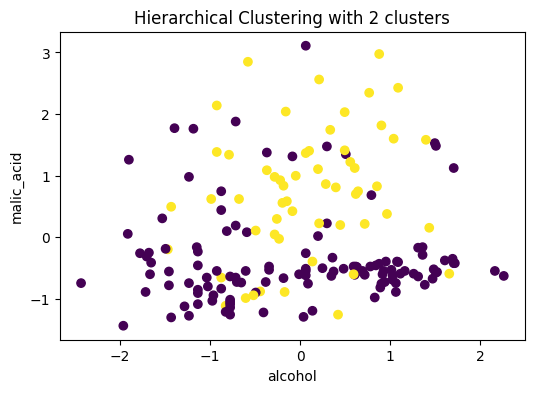

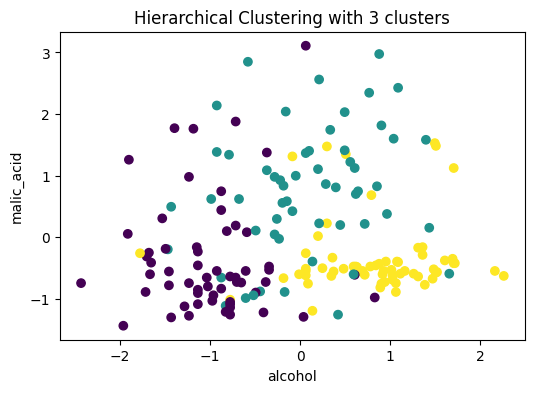

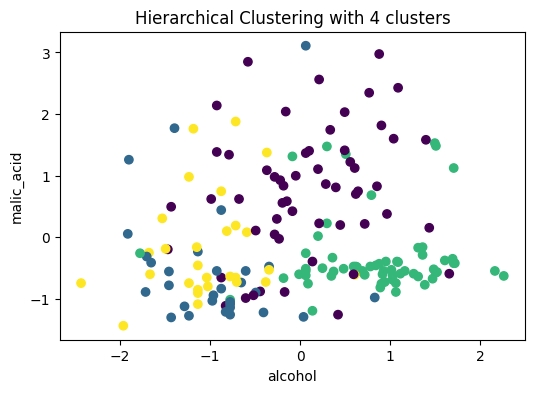

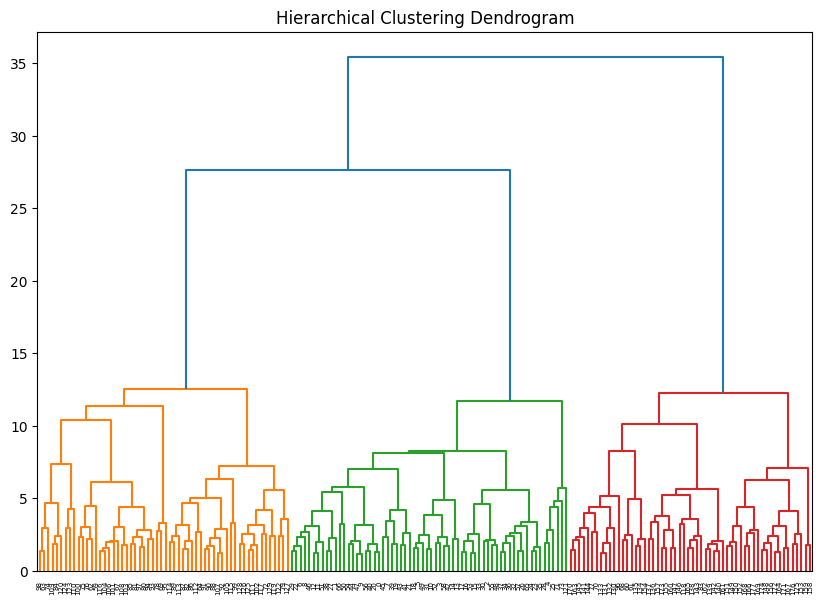

In [2]:
# Step 2: Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Hierarchical Clustering
for n_clusters in [2, 3, 4]:
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hc.fit_predict(X_scaled)
    plt.figure(figsize=(6,4))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
    plt.title(f'Hierarchical Clustering with {n_clusters} clusters')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.show()

# Generate dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

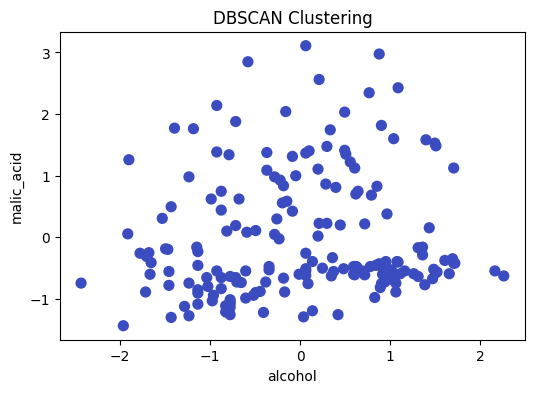

Silhouette Score: Not enough clusters for silhouette score
Homogeneity Score: 0.0
Completeness Score: 1.0


In [3]:
# Step 3: DBSCAN Clustering

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=db_labels, cmap='coolwarm', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()

# Evaluate clustering
# Remove noise points for silhouette score (-1 label)
mask = db_labels != -1
if sum(mask) > 1:
    sil_score = silhouette_score(X_scaled[mask], db_labels[mask])
else:
    sil_score = 'Not enough clusters for silhouette score'

print("Silhouette Score:", sil_score)
print("Homogeneity Score:", homogeneity_score(df['target'], db_labels))
print("Completeness Score:", completeness_score(df['target'], db_labels))